In [80]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import re

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from keras_tuner import RandomSearch
from tensorflow.keras.utils import plot_model
import json



In [4]:
# load the data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Write a funciton to clean up column names
def clean_col_name(col):
    col = col.replace('_', ' ')  # Replace underscores with space
    col = col.title()  # Capitalize each word
    return col

In [6]:
# Apply the function to the column names
df.columns = [clean_col_name(col) for col in df.columns]

In [7]:
df.describe()

,Age,Anaemia,Creatinine Phosphokinase,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot: >

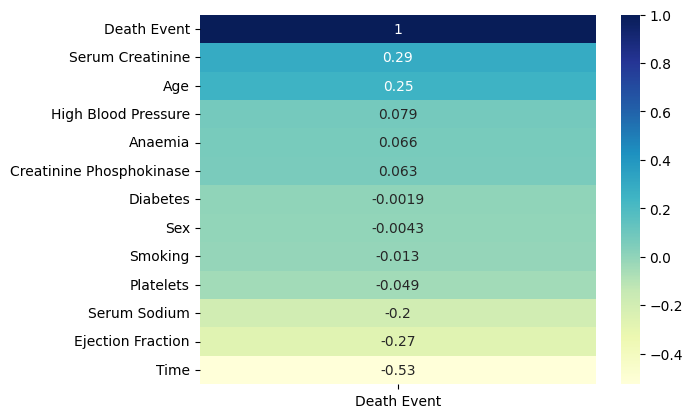

In [8]:
# Show correlation between with 'survived'
corr_matrix = df.corr()
survived_corr = corr_matrix['Death Event'].sort_values(ascending=False)
sns.heatmap(survived_corr.to_frame(), cmap='YlGnBu', annot=True)


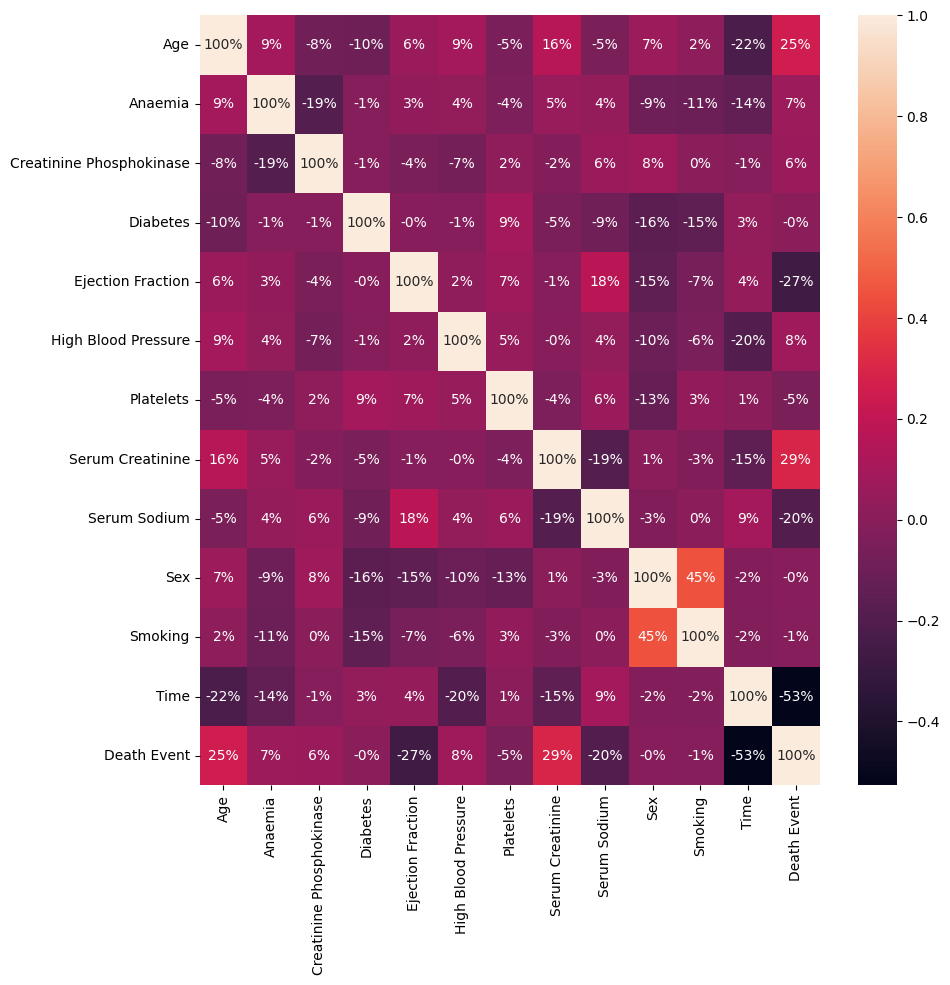

In [9]:
# Plot heatmap to see the correlation between the features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

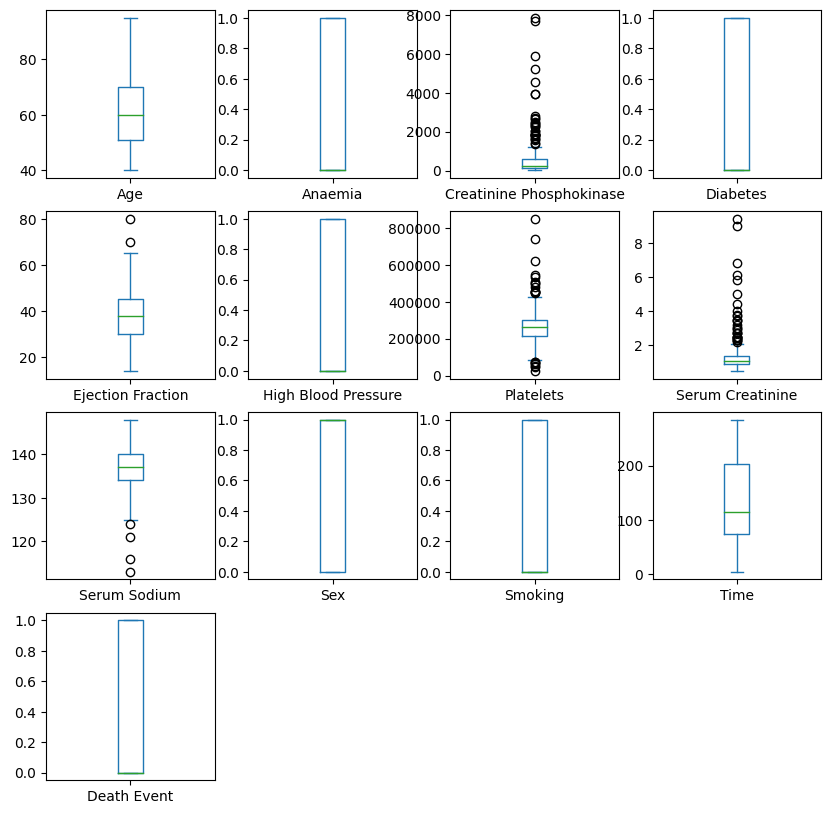

In [10]:
# plot boxplot of all columns to see the outliers
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10))
plt.show()

Data Preprocessing

In [11]:
# Define independent and dependent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [12]:
X

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [13]:
# Scaling the data
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)

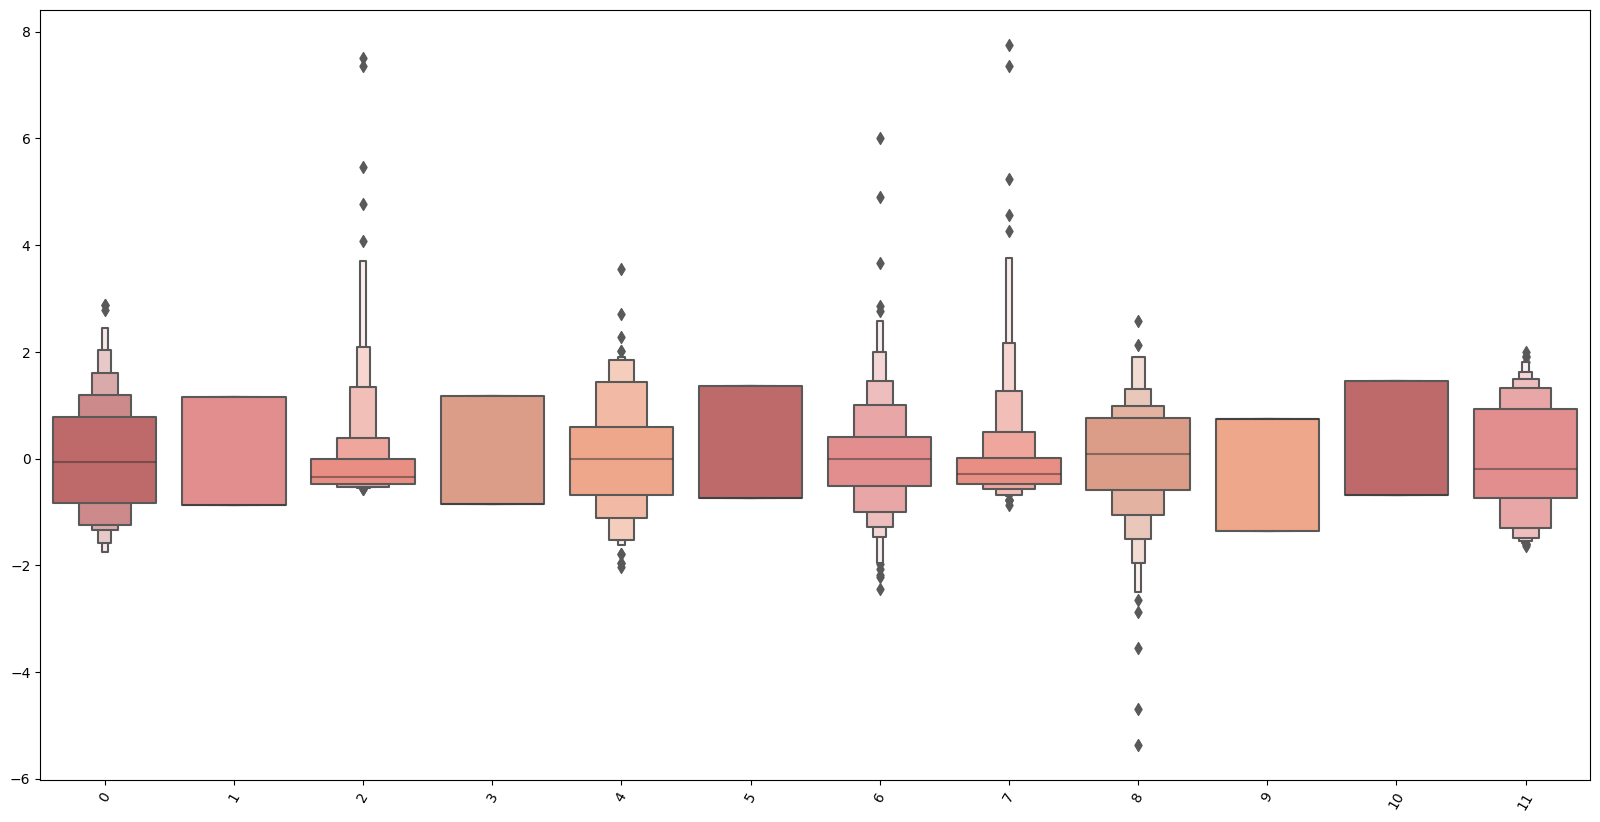

In [14]:
#Plotting the scaled features using boxen plots
colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

In [37]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=25)

In [38]:
# Artificial Neural Network

# Initialize the ANN
model = Sequential()

# Add the input layer
model.add(Dense(units = 16, kernel_initializer= 'uniform', activation= 'relu', input_dim = 12))

# Add the hidden layer
model.add(Dense(units = 5, kernel_initializer= 'uniform', activation= 'relu'))

# Add second hidden layer
model.add(Dense(units = 3, kernel_initializer= 'uniform', activation= 'relu'))

# Regularization
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 1, kernel_initializer= 'uniform', activation= 'sigmoid'))

# Compile the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [67]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 25, epochs = 50)

Epoch 1/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.8947
Epoch 2/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.8660
Epoch 3/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8756
Epoch 4/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2465 - accuracy: 0.9091
Epoch 5/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2601 - accuracy: 0.8756
Epoch 6/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2238 - accuracy: 0.9091
Epoch 7/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2731 - accuracy: 0.8756
Epoch 8/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2689 - accuracy: 0.8900
Epoch 9/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2423 - accuracy: 0.8900
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9043
Epoch 11/50
9/9 [======================

In [68]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.4, 1 , 0)

3/3 [==============================] - 0s 1ms/step


In [69]:
# Convert output values from multidemnsional array to 1D array
y_pred = y_pred.flatten()

In [70]:
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
85,0,0
86,1,1
87,0,0
88,0,0


In [71]:
##classification report
#print(classification_report(y_test, y_pred))

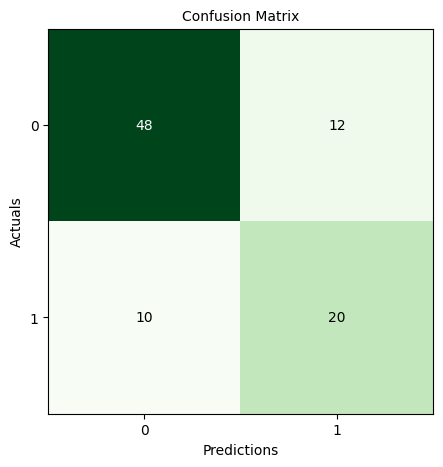

In [72]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()


In [73]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)

AUC: 0.733333


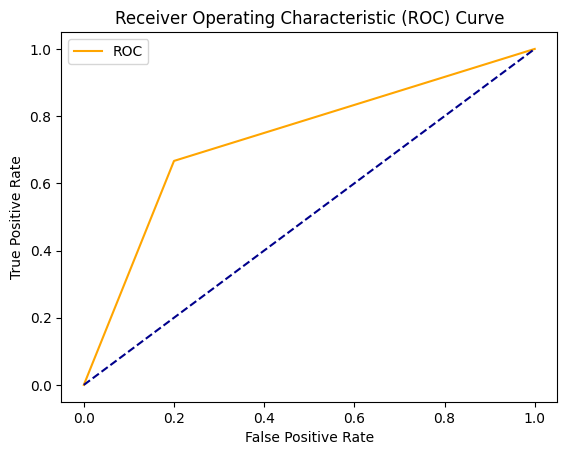

In [74]:
fpr, tpr = roc_curve(y_test, y_pred)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [75]:
# Evaluate model accuracy
print("Accuracy of the model is - " , model.evaluate(X_test, y_test)[1]*100 , "%")

3/3 [==============================] - 0s 2ms/step - loss: 0.7695 - accuracy: 0.7444
Accuracy of the model is -  74.44444298744202 %


In [ ]:
# Optimising number of layers

def build_model(hp):
    model = keras.Sequential()

    # Add the input layer
    model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32), input_shape=(X_train.shape[1],), activation='relu'))
    
    # Add the hidden layers 
    # Establish loop to check for the number of layers between 1 and 5
    for i in range(hp.Int('num_layers', 1, 5)):

        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))
        
        # Add dropout to prevent overfitting
        model.add(layers.Dropout(hp.Float('dropout_' + str(i), 0, 0.5, step=0.1)))

    # Add the output layer    
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='my_project'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


In [77]:
# Print out the number of layers
print("Optimal number of layers: " + str(best_hps.get('num_layers')))

Optimal number of layers: 2


In [78]:
print("Accuracy of the model is - " , best_model.evaluate(X_test, y_test)[1]*100 , "%")

3/3 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.8222
Accuracy of the model is -  82.22222328186035 %


In [81]:
print(json.dumps(best_hps.values, indent=4))


{
    "units_input": 352,
    "num_layers": 2,
    "units_0": 512,
    "dropout_0": 0.0,
    "learning_rate": 0.001,
    "units_1": 32,
    "dropout_1": 0.30000000000000004,
    "units_2": 160,
    "dropout_2": 0.0
}
